In [1]:
# import all the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.datasets import load_iris

In [2]:
# Load and preprocess the data

data=load_iris()
print(data.feature_names)
print()
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

['setosa' 'versicolor' 'virginica']


In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.data    # array form lets check its dimension

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
data.data.ndim   # its 2 dimensional array

2

In [6]:
# now seperating the data into X and y
X=data.data
y=data.target

In [7]:
# split the data into train and test shape

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# check the shape  of the dataset

print(f"X_train {X_train.shape} ")
print(f"y_train {y_train.shape} ")

print()

print(f"X_test {X_test.shape} ")
print(f"y_test {y_test.shape} ")

X_train (120, 4) 
y_train (120,) 

X_test (30, 4) 
y_test (30,) 


In [9]:
# scale the feature

scaler=StandardScaler()
X_train=X_train.astype(np.float32)  # converting the dataype
X_test=X_test.astype(np.float32)   # converting the datatype

X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [10]:
X_train  # scaled data

array([[-1.4739369 ,  1.2036577 , -1.5625348 , -1.3126029 ],
       [-0.13307102,  2.9923759 , -1.2760063 , -1.0456327 ],
       [ 1.085898  ,  0.08570917,  0.3858583 ,  0.28921756],
       [-1.2301427 ,  0.7564788 , -1.2187006 , -1.3126029 ],
       [-1.7177305 ,  0.30929923, -1.3906177 , -1.3126029 ],
       [ 0.5983109 , -1.255829  ,  0.7296923 ,  0.9566427 ],
       [ 0.7202077 ,  0.30929923,  0.4431639 ,  0.4227026 ],
       [-0.74255556,  0.98006827, -1.2760063 , -1.3126029 ],
       [-0.98634917,  1.2036577 , -1.333312  , -1.3126029 ],
       [-0.74255556,  2.3216062 , -1.2760063 , -1.446088  ],
       [-0.01117364, -0.80864936,  0.78699785,  0.9566427 ],
       [ 0.23261996,  0.7564788 ,  0.4431639 ,  0.5561877 ],
       [ 1.085898  ,  0.08570917,  0.55777514,  0.4227026 ],
       [-0.49876142,  1.8744273 , -1.3906177 , -1.0456327 ],
       [-0.49876142,  1.4272478 , -1.2760063 , -1.3126029 ],
       [-0.3768646 , -1.4794184 , -0.01528148, -0.24472255],
       [ 0.5983109 , -0.

All the library has been imported and data has been scaled now we have to build ANN model

In [11]:
model=Sequential()

model.add(Dense(16,input_dim=4,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Training the model

train=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.3735 - loss: 1.5200 - val_accuracy: 0.0000e+00 - val_loss: 1.3857
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3844 - loss: 1.4628 - val_accuracy: 0.0000e+00 - val_loss: 1.3885
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4942 - loss: 1.2260 - val_accuracy: 0.0000e+00 - val_loss: 1.3921
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4363 - loss: 1.3530 - val_accuracy: 0.0000e+00 - val_loss: 1.3952
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5204 - loss: 1.2143 - val_accuracy: 0.0000e+00 - val_loss: 1.3998
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4900 - loss: 1.1533 - val_accuracy: 0.0000e+00 - val_loss: 1.4054
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5769 - loss: 1.1192 - val_accuracy: 0.0000e+00 - val_loss: 1.4078
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5131 - loss: 1.1873 - val_accuracy

In [13]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2333 - loss: 1.4081
Loss: 1.4080500602722168
Accuracy: 0.23333333432674408


In [14]:
print(train.history.keys())
# checking all the keys using history method because we want to plot the loss and accuracy graph

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


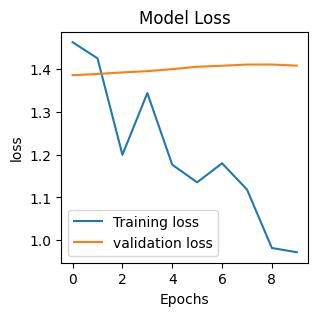

In [22]:
# Plot the accuracy graph

plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
plt.plot(train.history['loss'], label='Training loss')
plt.plot(train.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

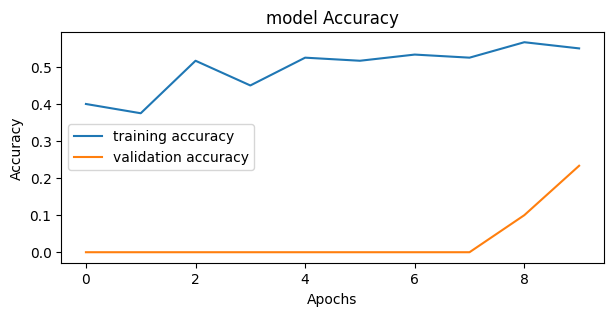

In [23]:
# plotting the model accuracy
plt.figure(figsize=(7,3))

plt.plot(train.history['accuracy'], label='training accuracy')
plt.plot(train.history['val_accuracy'], label='validation accuracy')
plt.title('model Accuracy')
plt.xlabel('Apochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [28]:
y_pred=model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [29]:
print(y_pred)   # we got the value in scaled form so we need to convert them into labels

[[0.31603822 0.17578977 0.5081721 ]
 [0.15889123 0.14901406 0.69209474]
 [0.3948057  0.15336867 0.45182556]
 [0.3410868  0.18384022 0.47507292]
 [0.2767617  0.16067548 0.5625629 ]
 [0.16624568 0.15672126 0.67703307]
 [0.3088376  0.18867797 0.50248444]
 [0.36857444 0.17679045 0.45463505]
 [0.29522023 0.17186852 0.53291124]
 [0.2931185  0.18009429 0.52678716]
 [0.38530362 0.18208508 0.43261138]
 [0.17821038 0.16861029 0.65317935]
 [0.14547148 0.14680545 0.707723  ]
 [0.17852113 0.16711879 0.65436006]
 [0.17900257 0.16295445 0.65804297]
 [0.35060424 0.18181296 0.46758276]
 [0.44797233 0.17754091 0.3744867 ]
 [0.29466057 0.18180901 0.52353036]
 [0.34774676 0.18724595 0.4650073 ]
 [0.43420392 0.1795257  0.38627037]
 [0.19896968 0.17609513 0.6249352 ]
 [0.38624135 0.18621984 0.4275388 ]
 [0.19196829 0.17006254 0.6379692 ]
 [0.42548627 0.17873403 0.39577973]
 [0.36196175 0.15664463 0.48139367]
 [0.3889563  0.180277   0.4307666 ]
 [0.36969107 0.16797441 0.46233454]
 [0.44126564 0.17498092 0.38

In [30]:
y_pred=np.argmax(y_pred,axis=1)  # it will return the class with high probability

In [31]:
y_pred  # it return the class labels with higher probability compre above

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2])

In [32]:
accuracy_score(y_test,y_pred)  # we got accuracy of 23 percent

0.23333333333333334

In [33]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0, 10],
       [ 0,  0,  9],
       [ 4,  0,  7]])